In [2]:
!pip install xgboost

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
import xgboost
from catboost import CatBoostClassifier
from sklearn import naive_bayes
from sklearn import metrics
import lightgbm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import shap

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [4]:
df=pd.read_csv('Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking for null values

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Filling null values in feature with median as Median is robust to outliers

In [7]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

### Checking the data type of features using the info() function

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:>

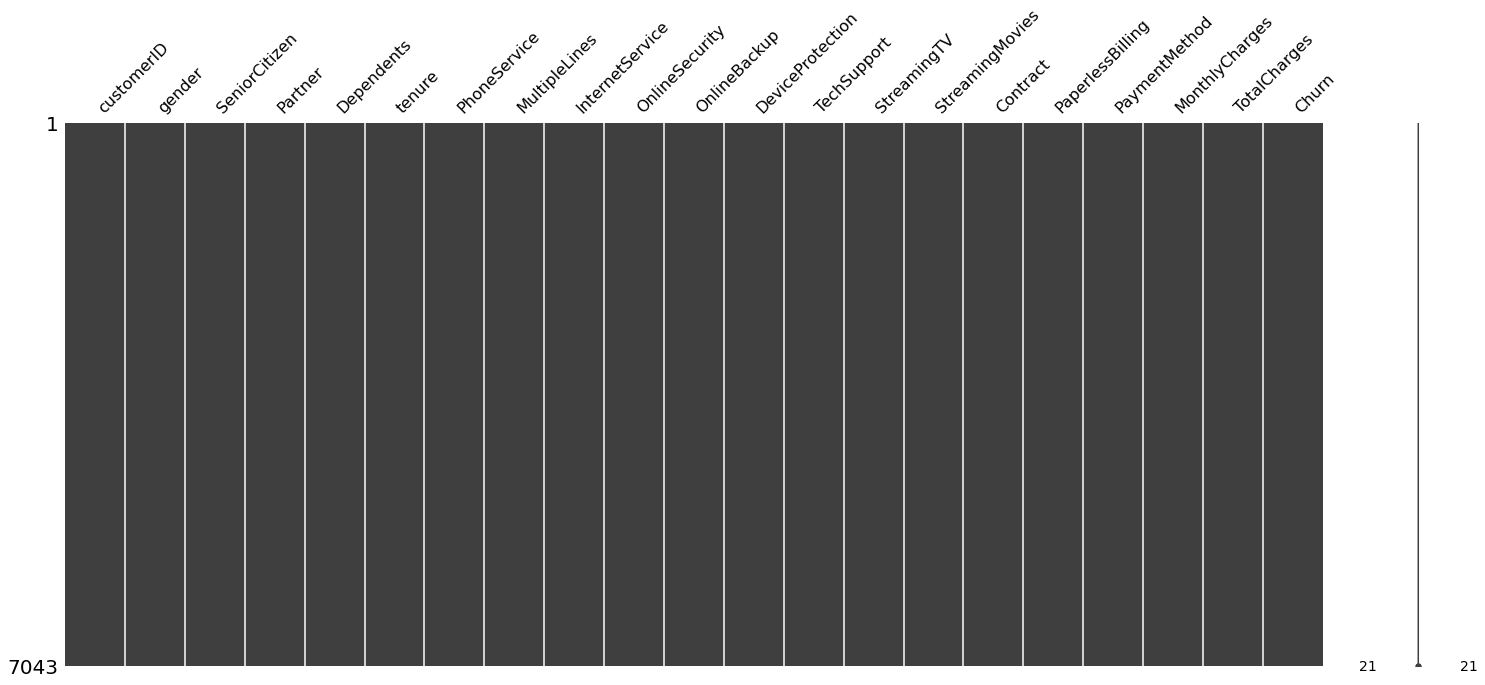

In [9]:
msno.matrix(df)

In [10]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [11]:
num_cols=df.select_dtypes(include=['int64','float64'])

## Exploring numerical features

In [12]:
num_cols

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


### Plotting Histograms of Numerical features for checking distribution of Data

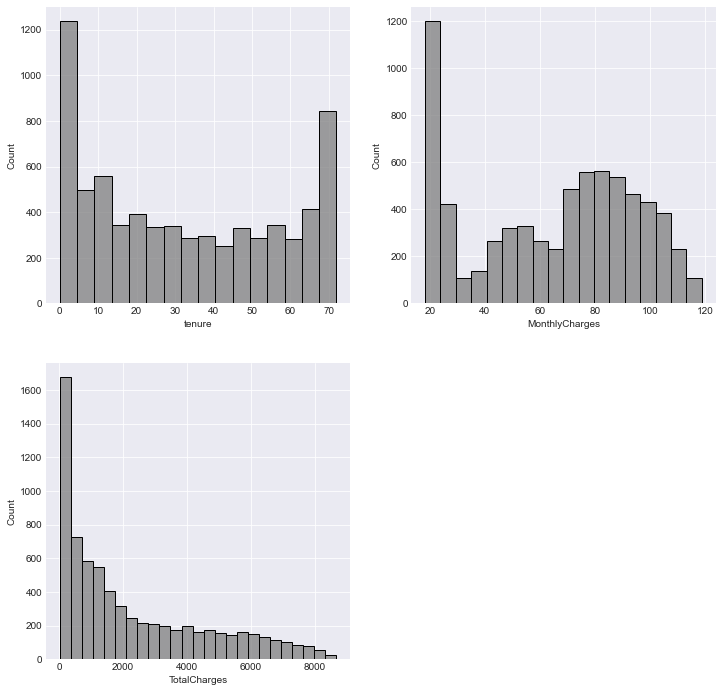

In [13]:
fig=plt.figure()
plt.style.use('seaborn-darkgrid')
for i,col in enumerate(num_cols):
    fig.add_subplot(2,2,i+1)
    fig.set_size_inches(12,12)
    sns.histplot(x=col,data=df,color='gray')

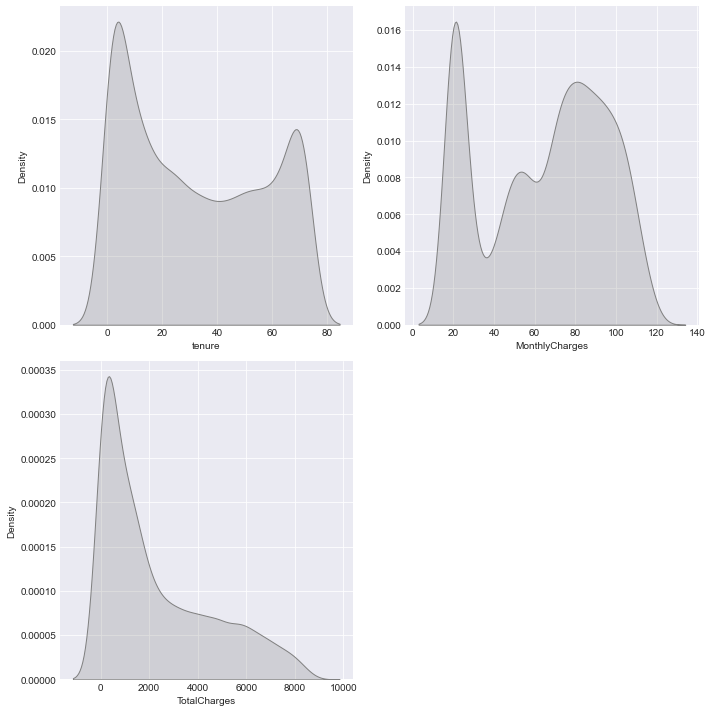

In [14]:
fig=plt.figure()
for i,col in enumerate(num_cols):
    fig.add_subplot(2,2,i+1)
    fig.set_size_inches(10,10)
    sns.kdeplot(x=col,data=df,fill=True,color='gray',linewidth=1)
    plt.tight_layout()

### Checking Skewness of each of the numerical Features

In [15]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

### Removing the skewness of "TotalCharges" by replacing values in the feature with their square root

In [16]:
df['TotalCharges']=np.sqrt(df['TotalCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

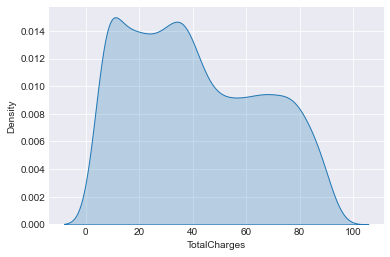

In [17]:
sns.kdeplot(df['TotalCharges'],data=df,fill=True)

In [18]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.309838
dtype: float64

### Checking for outliers

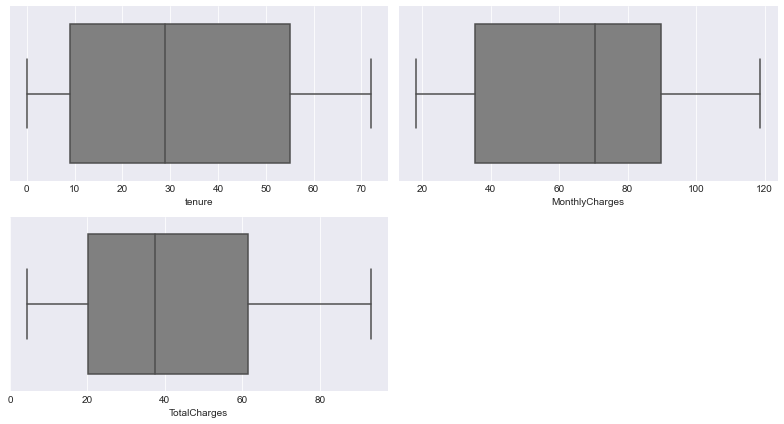

In [19]:
fig=plt.figure()
for i,col in enumerate(num_cols):
    fig.add_subplot(2,2,i+1)
    fig.set_size_inches(11,6)
    sns.boxplot(x=col,data=df,color='gray')
    plt.tight_layout()

## Checking for correlation

<AxesSubplot:>

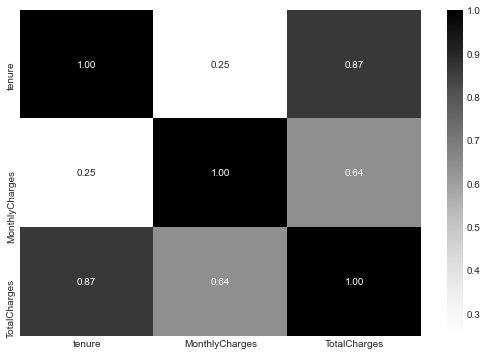

In [20]:
plt.figure(figsize=(9,6))
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',robust=True,cmap='Greys')

<AxesSubplot:xlabel='TotalCharges', ylabel='tenure'>

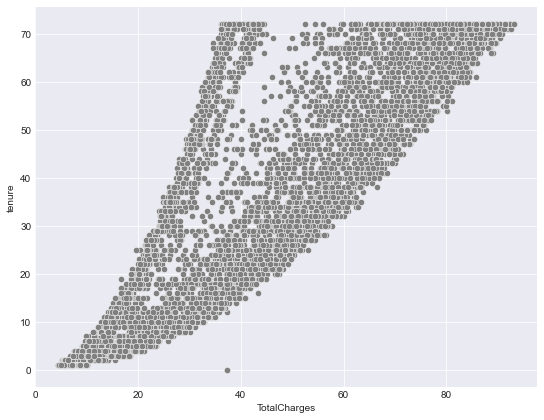

In [21]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='TotalCharges',y='tenure',data=df,s=40,color='gray')

In [22]:
object_cols=df.select_dtypes('object')

In [23]:
object_cols=object_cols.drop(['customerID','Churn'],axis=1)

### Below are bar plots illustrating categorical features segregated on whether churn or no churn.
* Customers having partners are less likely to leave as compared to those who do not.
* Fibre optic Internet service has customers with high amount of greater churn which implies that DSl Internet service should be increased as they have less churn customers.
* Online Security should be increased to reduce the churn rate of customers.
* Online Backup facility should be provided.
* Device protection should be provided for reducing customer churn and keep people tied to the company.
* Changes must be made in Monthly Charges for customers such that it does not lead to greater churn rate and customers can seamlessly buy Monthly plans without hampering Business sales.

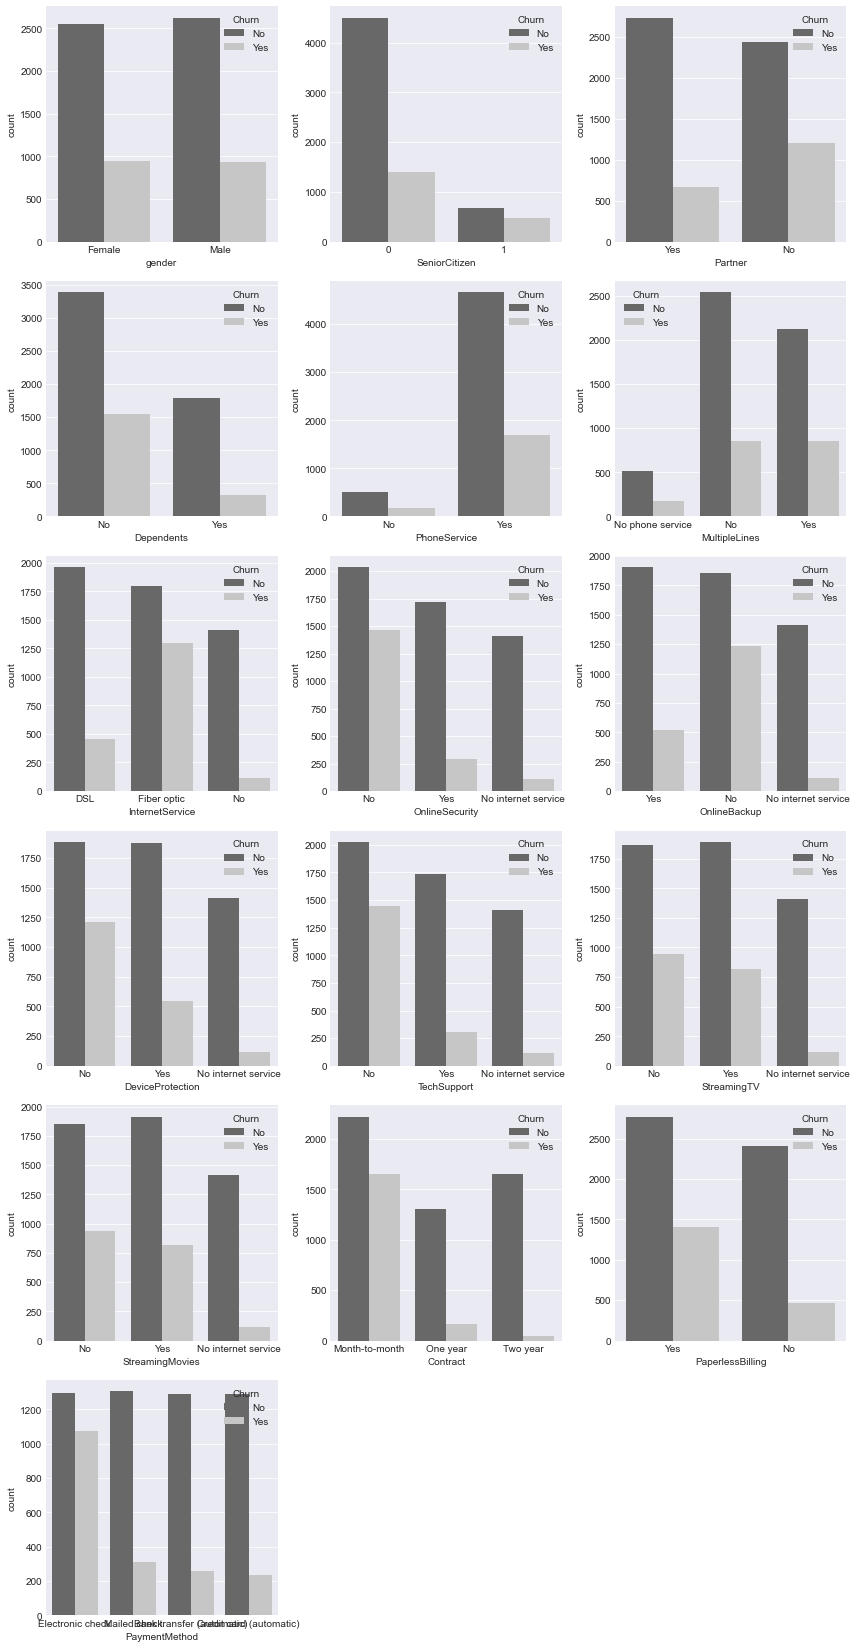

In [24]:
fig=plt.figure()
for i,col in enumerate(object_cols):
    fig.add_subplot(6,3,i+1)
    fig.set_size_inches(12,23)
    sns.countplot(x=col,data=df,hue='Churn',palette='Greys_r')
    plt.tight_layout()

<AxesSubplot:xlabel='Churn', ylabel='count'>

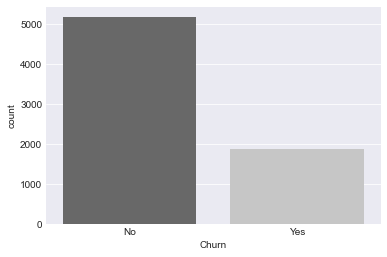

In [25]:
sns.countplot(x='Churn',data=df,palette='Greys_r')

In [26]:
encode=LabelEncoder()
for col in object_cols:
    df[col]=encode.fit_transform(df[col].values)

In [27]:
df['Churn']=encode.fit_transform(df['Churn'].values)

In [28]:
X=df.drop(['customerID','Churn'],axis=1)
y=df.Churn

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.44,stratify=y)

## Comparing models for efficiency.
### As target feature is imbalanced a better metric for evaluation would be f1-score
### We see that CatBoost and AdaBoost provide better f1-score as compared to other models.
### Primary features which contribute to the evaluation are total charges and monthly charges. Modification can be bought in them to enhance customer satisfaction and reduce churn rate of customers.

In [46]:
def score(model,X_train=X_train,
         X_test=X_test,y_train=y_train,y_test=y_test):
         model=model()
         model.fit(X_train,y_train)
         preds=model.predict(X_test)
         print(metrics.classification_report(y_test,preds))
         imp=model.feature_importances_
         cols=X.columns
         dta=pd.DataFrame(imp,cols)
         dta.plot.barh(figsize=(8,7))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2277
           1       0.64      0.49      0.55       822

    accuracy                           0.79      3099
   macro avg       0.73      0.69      0.71      3099
weighted avg       0.78      0.79      0.78      3099



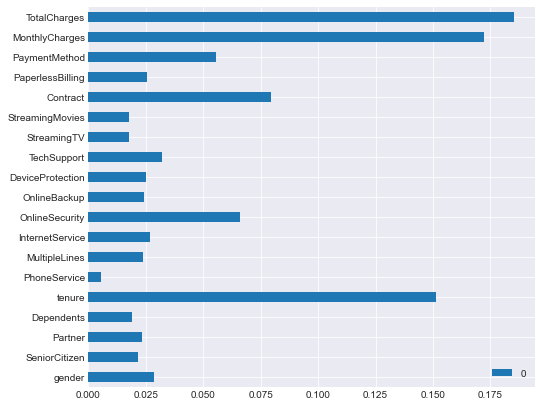

In [47]:
score(ensemble.RandomForestClassifier)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2277
           1       0.61      0.52      0.56       822

    accuracy                           0.79      3099
   macro avg       0.72      0.70      0.71      3099
weighted avg       0.78      0.79      0.78      3099



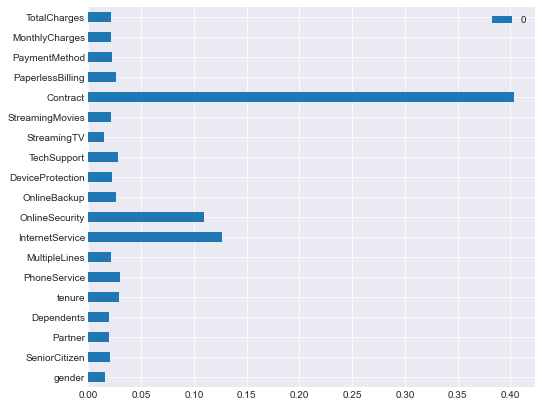

In [48]:
score(xgboost.XGBClassifier)

Learning rate set to 0.01851
0:	learn: 0.6796135	total: 5.7ms	remaining: 5.69s
1:	learn: 0.6666506	total: 11.3ms	remaining: 5.63s
2:	learn: 0.6545731	total: 15.1ms	remaining: 5.02s
3:	learn: 0.6435614	total: 18.5ms	remaining: 4.61s
4:	learn: 0.6324998	total: 25.1ms	remaining: 5s
5:	learn: 0.6229095	total: 29.4ms	remaining: 4.86s
6:	learn: 0.6145678	total: 31.9ms	remaining: 4.52s
7:	learn: 0.6048744	total: 35.9ms	remaining: 4.46s
8:	learn: 0.5957311	total: 40.9ms	remaining: 4.51s
9:	learn: 0.5899111	total: 43.5ms	remaining: 4.3s
10:	learn: 0.5819671	total: 47.1ms	remaining: 4.24s
11:	learn: 0.5740119	total: 52.5ms	remaining: 4.33s
12:	learn: 0.5668610	total: 58.2ms	remaining: 4.42s
13:	learn: 0.5597995	total: 61.7ms	remaining: 4.34s
14:	learn: 0.5538820	total: 68.2ms	remaining: 4.47s
15:	learn: 0.5481230	total: 71.7ms	remaining: 4.41s
16:	learn: 0.5420123	total: 75.5ms	remaining: 4.36s
17:	learn: 0.5363294	total: 79.7ms	remaining: 4.35s
18:	learn: 0.5304368	total: 83.3ms	remaining: 4.3s

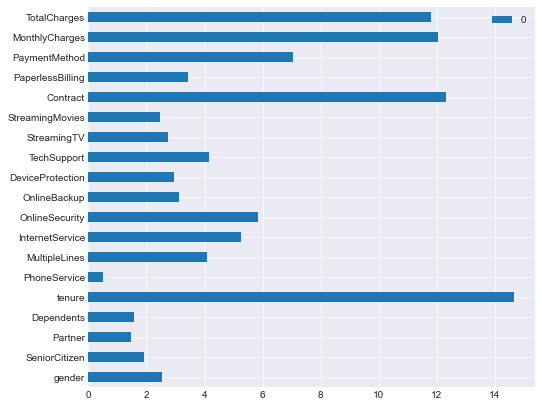

In [49]:
score(CatBoostClassifier)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2277
           1       0.65      0.52      0.58       822

    accuracy                           0.80      3099
   macro avg       0.74      0.71      0.72      3099
weighted avg       0.79      0.80      0.79      3099



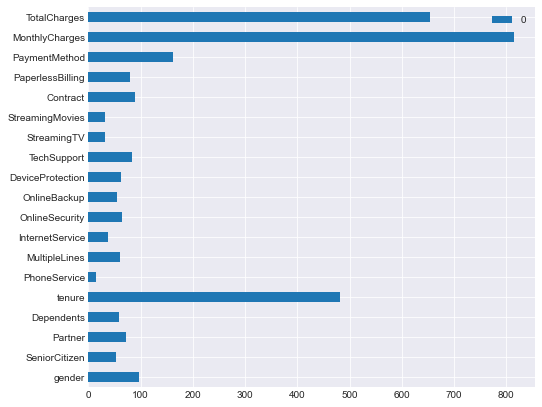

In [51]:
score(lightgbm.LGBMClassifier)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2277
           1       0.68      0.54      0.60       822

    accuracy                           0.81      3099
   macro avg       0.76      0.72      0.74      3099
weighted avg       0.80      0.81      0.80      3099



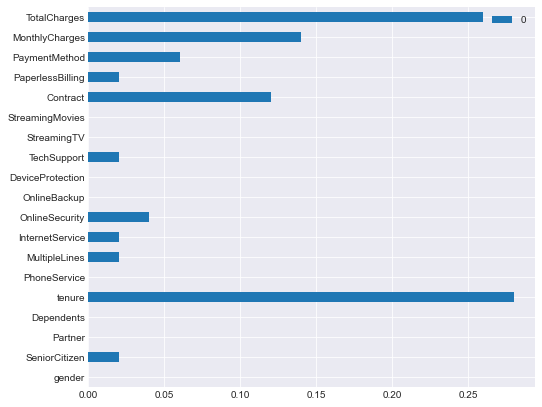

In [52]:
score(ensemble.AdaBoostClassifier)